In [15]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

In [16]:
file_path = 'Usability_study_data.csv'
data = pd.read_csv(file_path)

In [17]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

In [18]:
keys = data.columns.tolist()

In [19]:
questions = {}

for key in keys:
    question = (key[:key.find("[")].strip())
    framework = key[key.find("["):].strip()
    if framework in ['[DSPy]','[LMQL]','[MTLLM]']:
        if question != 'Would you recommend this framework to others?':
            if question not in questions.keys():
                questions[question] = pd.DataFrame()
            questions[question][framework] = (((data.map(lambda x: x[0] if isinstance(x, str) else x))[key]).astype(int))

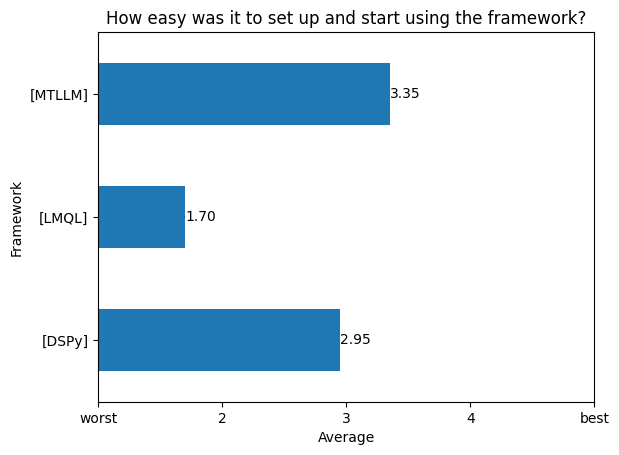

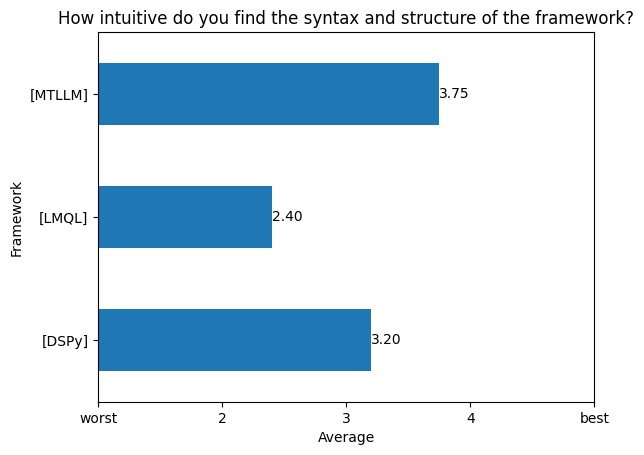

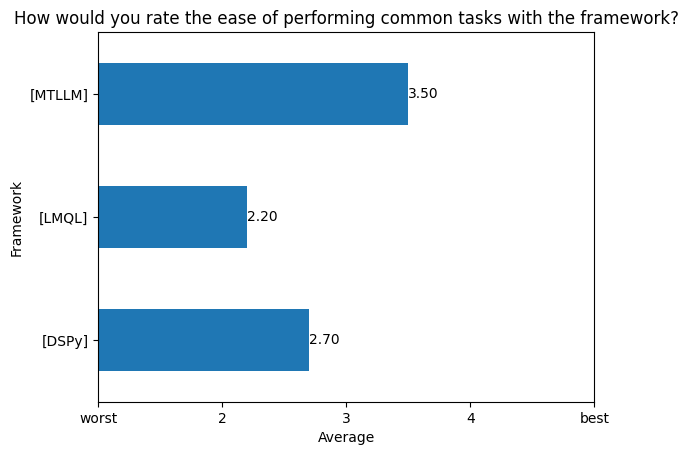

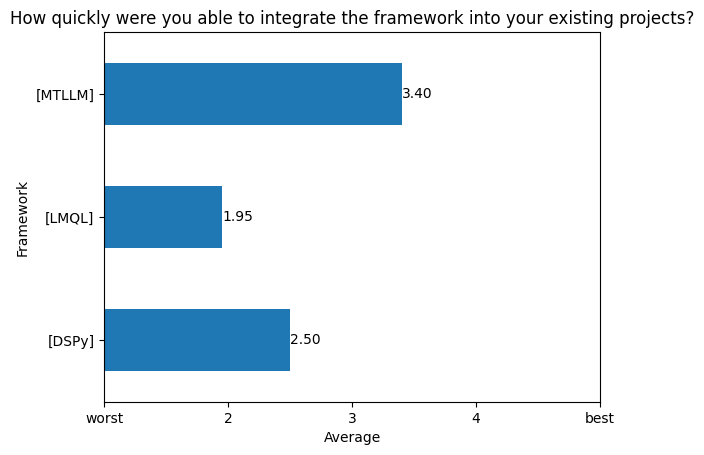

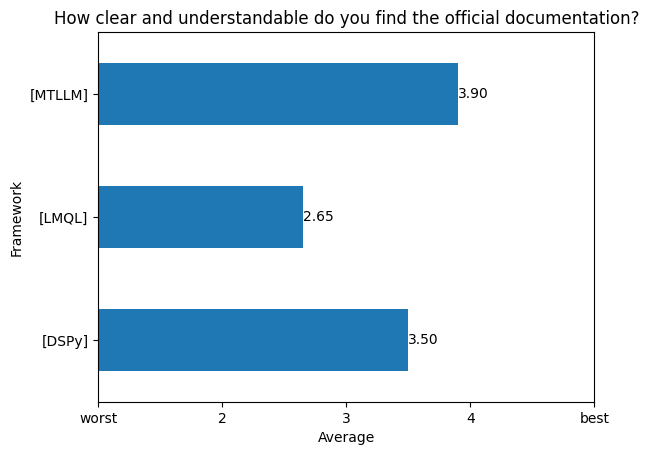

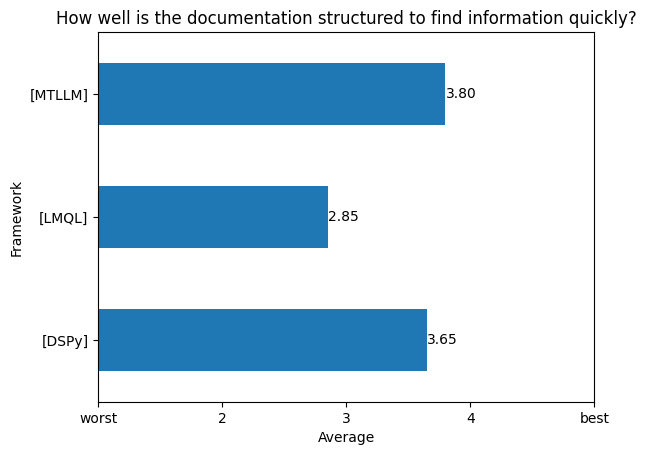

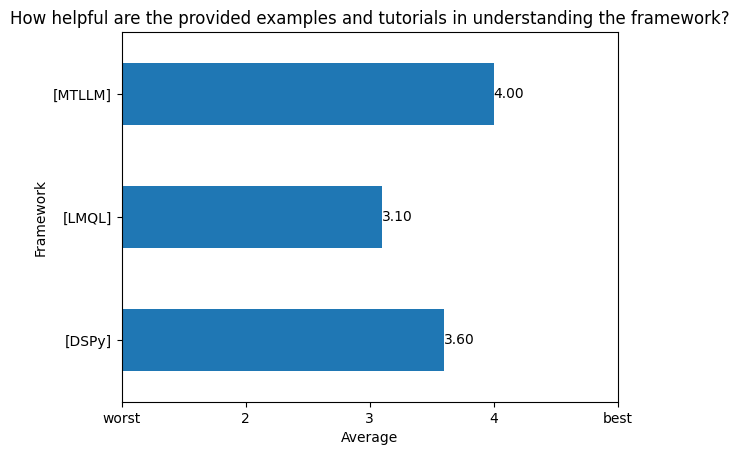

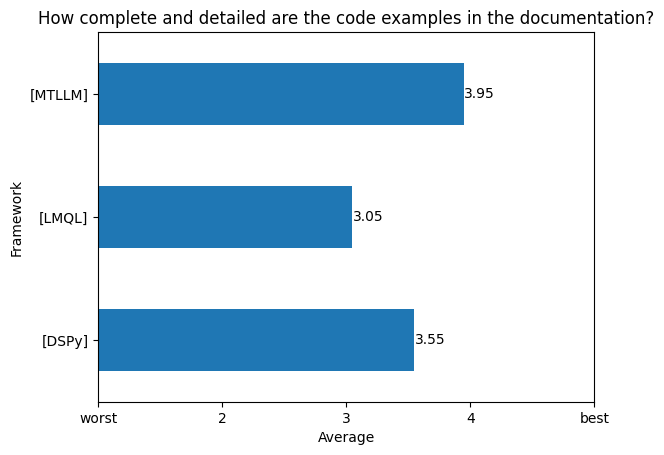

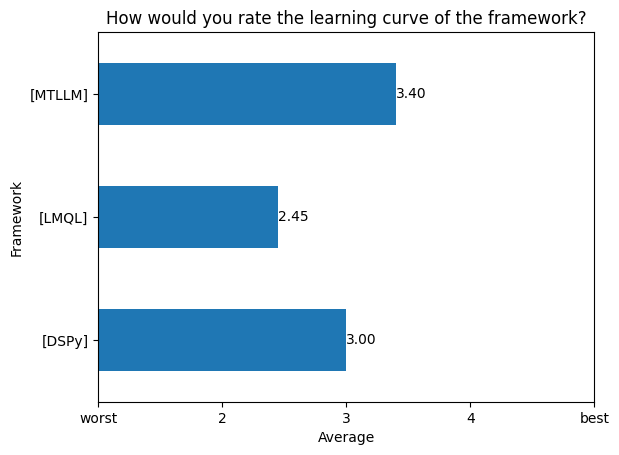

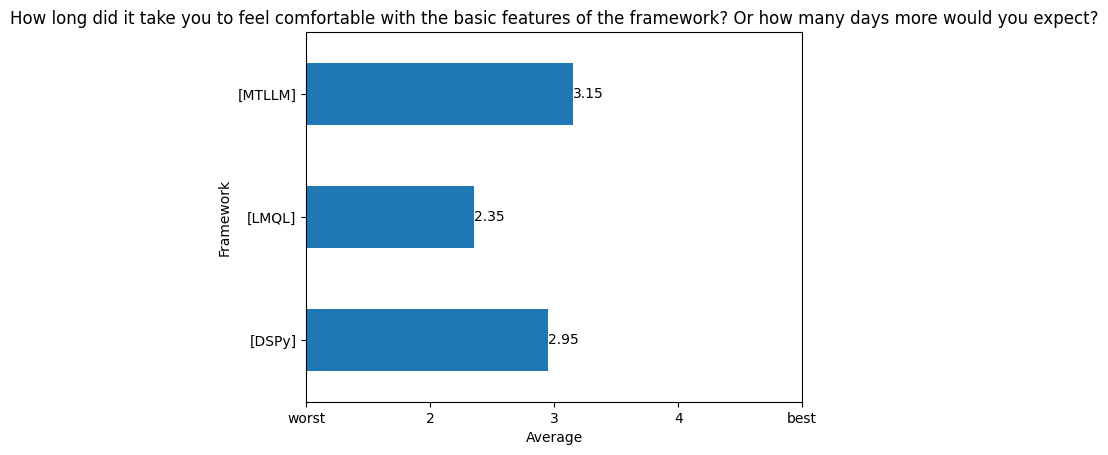

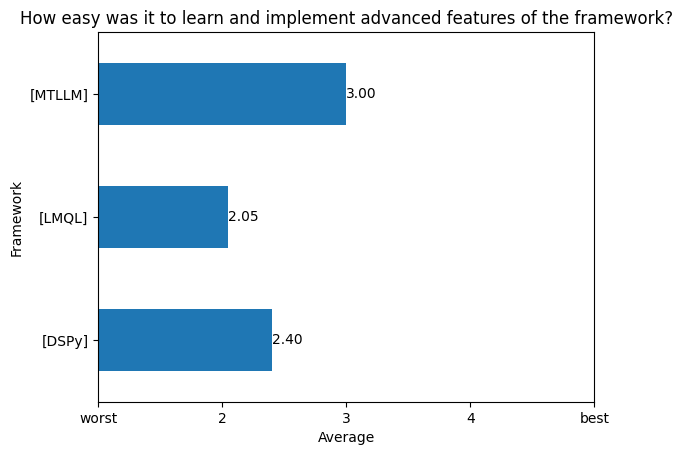

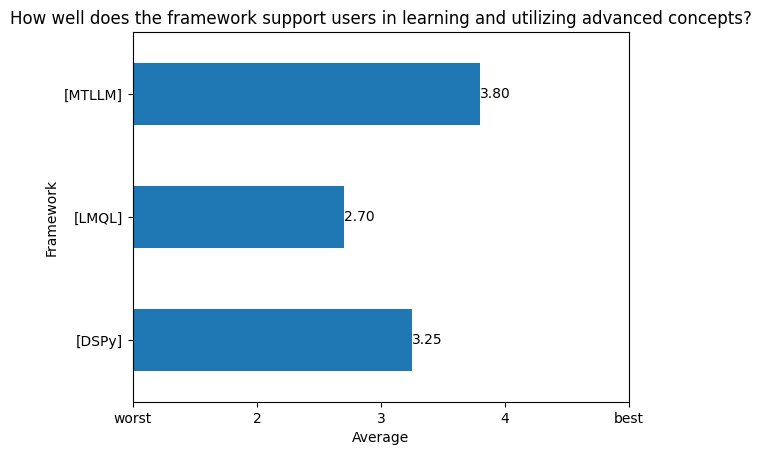

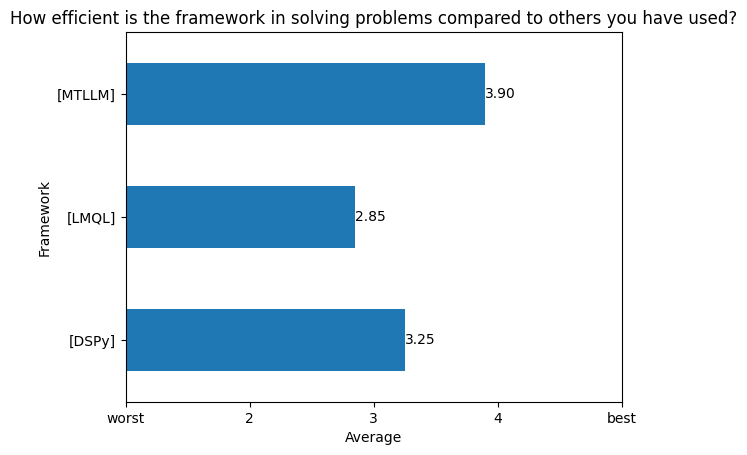

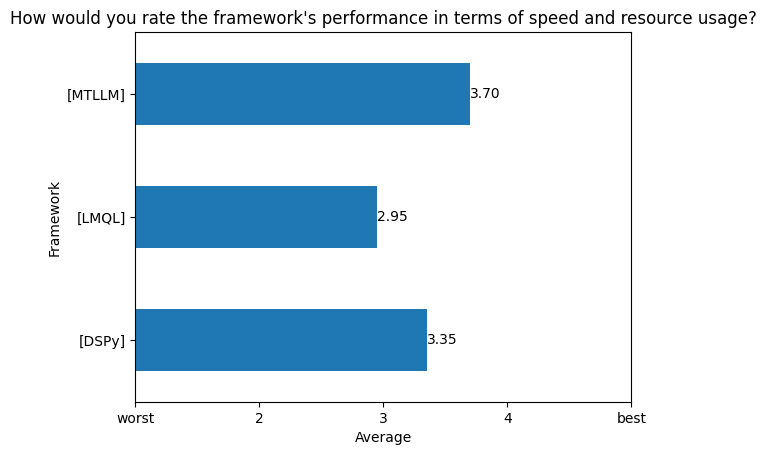

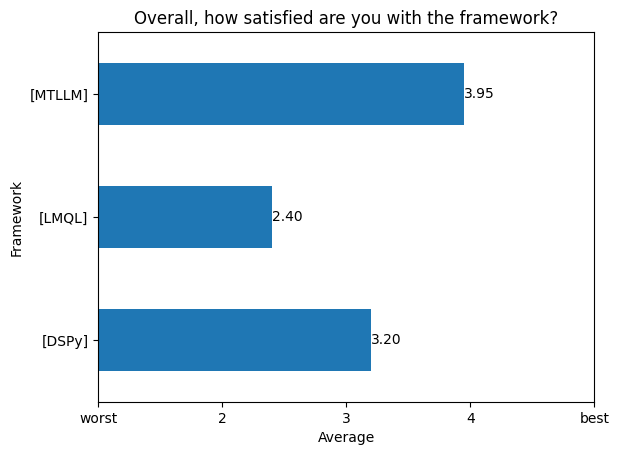

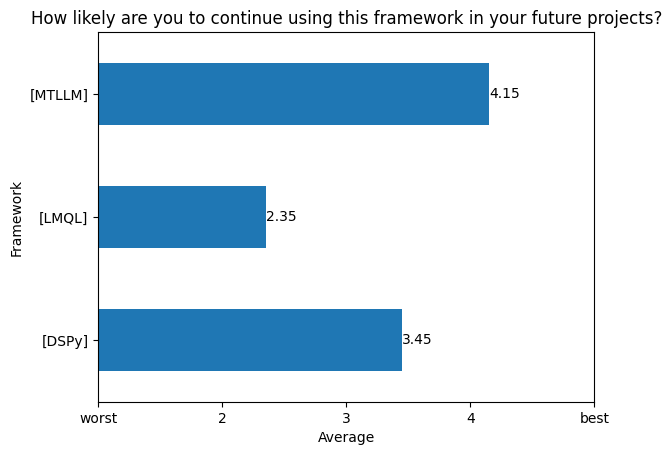

In [20]:
import matplotlib.pyplot as plt

for question, df in questions.items():
    means = df.mean()
    means.plot(kind='barh')
    plt.title(question)
    plt.xlabel('Average')
    plt.ylabel('Framework')
    plt.xlim(1, 5)
    plt.xticks([1, 2, 3, 4, 5], ['worst', 2, 3, 4, 'best'])
    for index, value in enumerate(means):
        plt.text(value, index, f'{value:.2f}', va='center')
    plt.show()

[<matplotlib.patches.Rectangle object at 0x7fca1451bfe0>, <matplotlib.patches.Rectangle object at 0x7fca13e41cd0>, <matplotlib.patches.Rectangle object at 0x7fca13e422a0>]


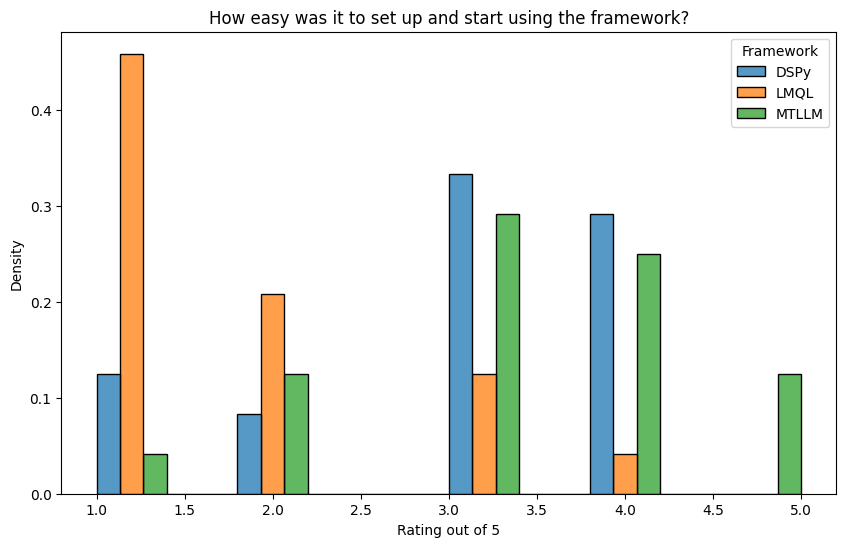

[<matplotlib.patches.Rectangle object at 0x7fca13d17530>, <matplotlib.patches.Rectangle object at 0x7fca14bca240>, <matplotlib.patches.Rectangle object at 0x7fca14bca990>]


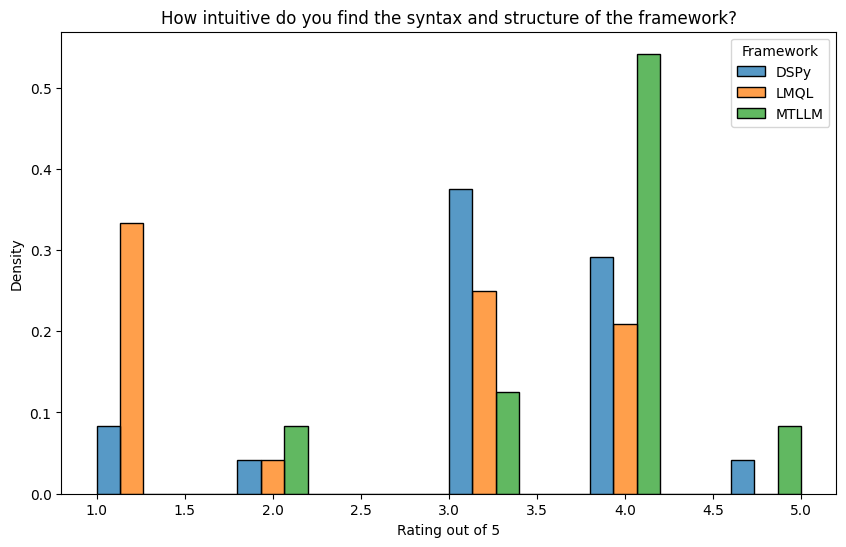

[<matplotlib.patches.Rectangle object at 0x7fca147bf170>, <matplotlib.patches.Rectangle object at 0x7fca147bf380>, <matplotlib.patches.Rectangle object at 0x7fca14bb17f0>]


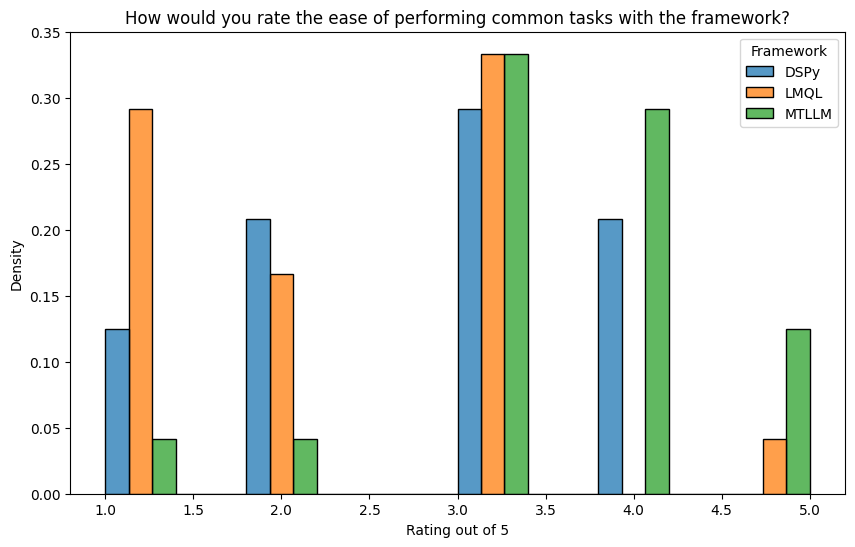

[<matplotlib.patches.Rectangle object at 0x7fca14d220c0>, <matplotlib.patches.Rectangle object at 0x7fca16d6a810>, <matplotlib.patches.Rectangle object at 0x7fca16d95580>]


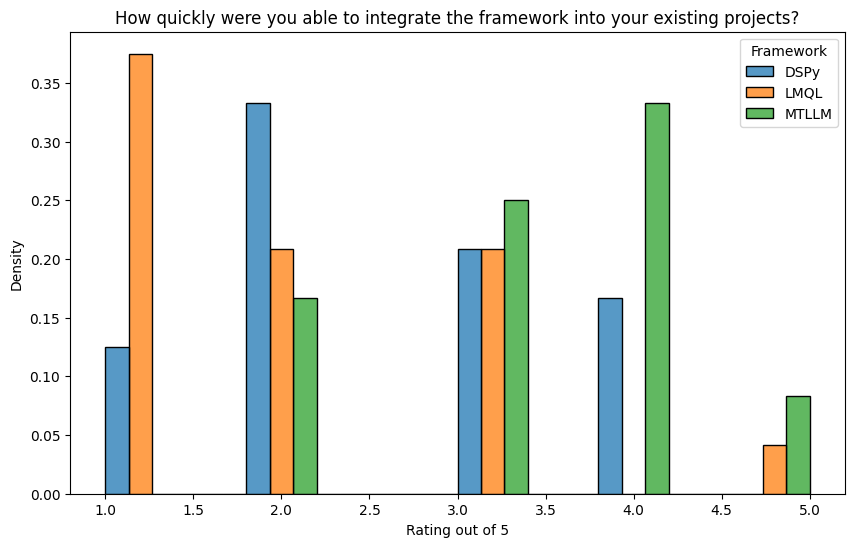

[<matplotlib.patches.Rectangle object at 0x7fca1409c620>, <matplotlib.patches.Rectangle object at 0x7fca1409ef30>, <matplotlib.patches.Rectangle object at 0x7fca1409f440>]


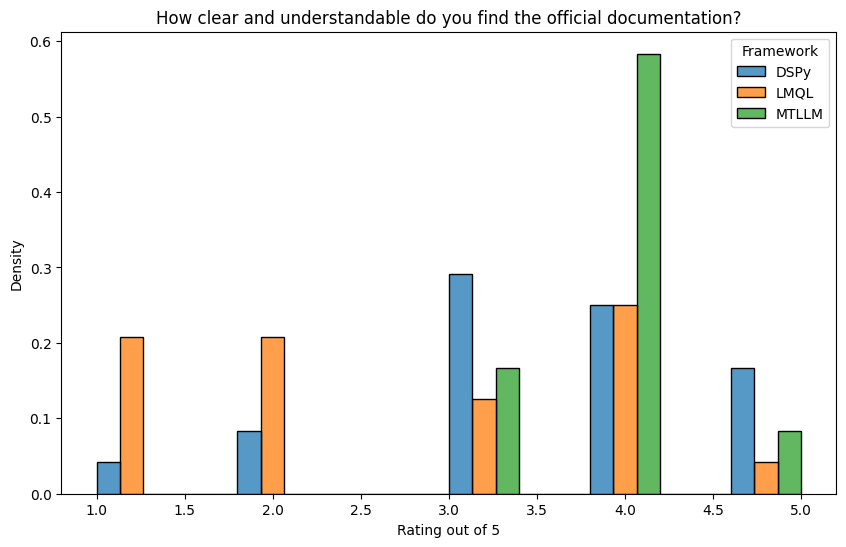

[<matplotlib.patches.Rectangle object at 0x7fca13d79e50>, <matplotlib.patches.Rectangle object at 0x7fca13d7b050>, <matplotlib.patches.Rectangle object at 0x7fca13d7b440>]


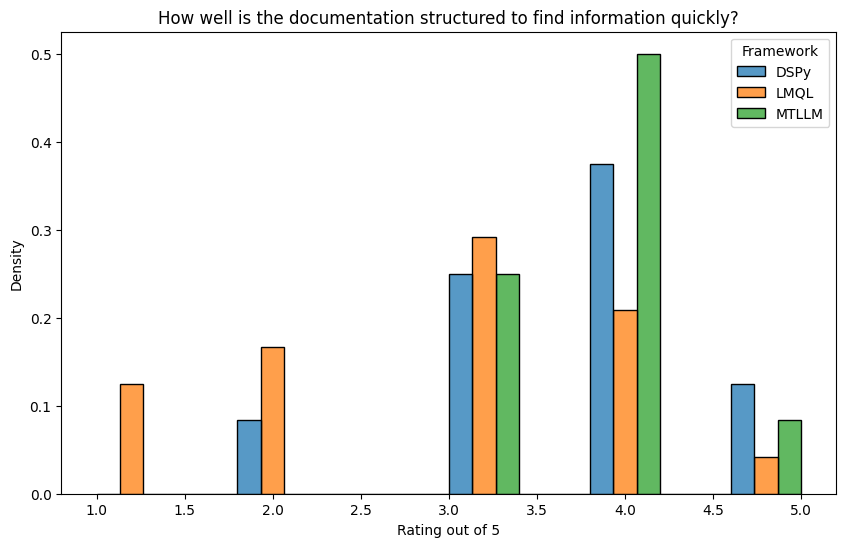

[<matplotlib.patches.Rectangle object at 0x7fca145ff5f0>, <matplotlib.patches.Rectangle object at 0x7fca145ff3e0>, <matplotlib.patches.Rectangle object at 0x7fca145fcbc0>]


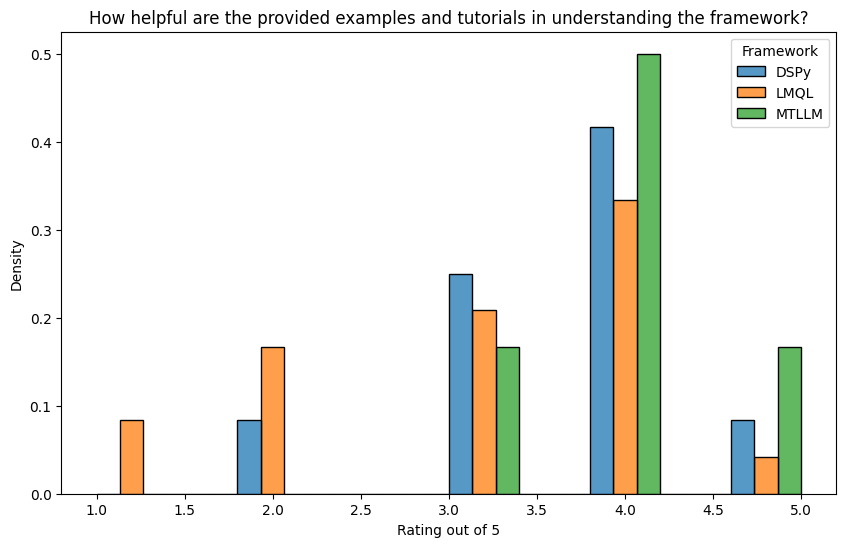

[<matplotlib.patches.Rectangle object at 0x7fca145cf920>, <matplotlib.patches.Rectangle object at 0x7fca145cca10>, <matplotlib.patches.Rectangle object at 0x7fca145cf2f0>]


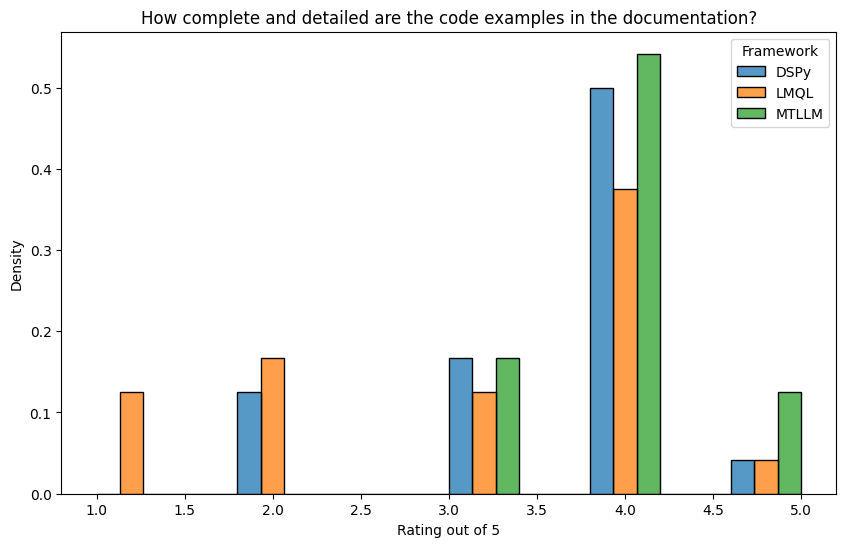

[<matplotlib.patches.Rectangle object at 0x7fca142c22a0>, <matplotlib.patches.Rectangle object at 0x7fca142794c0>, <matplotlib.patches.Rectangle object at 0x7fca14278da0>]


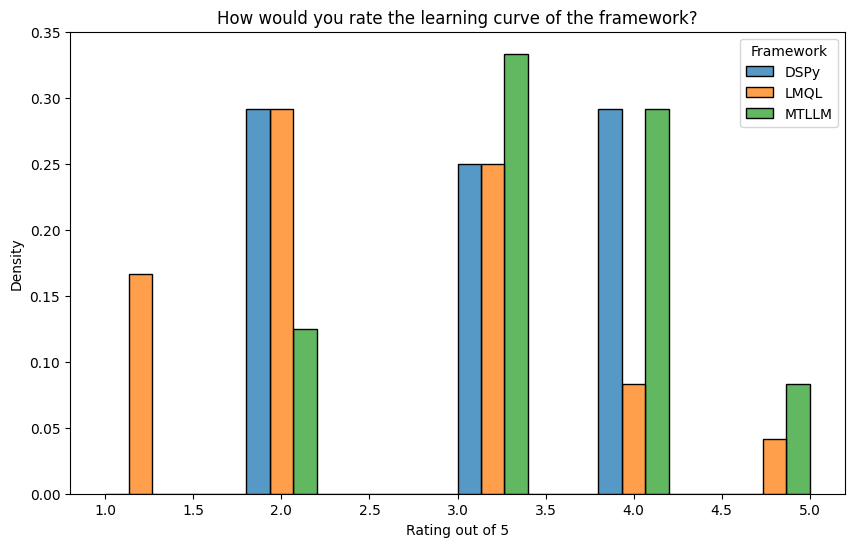

[<matplotlib.patches.Rectangle object at 0x7fca1459ca10>, <matplotlib.patches.Rectangle object at 0x7fca1459d4f0>, <matplotlib.patches.Rectangle object at 0x7fca1459d880>]


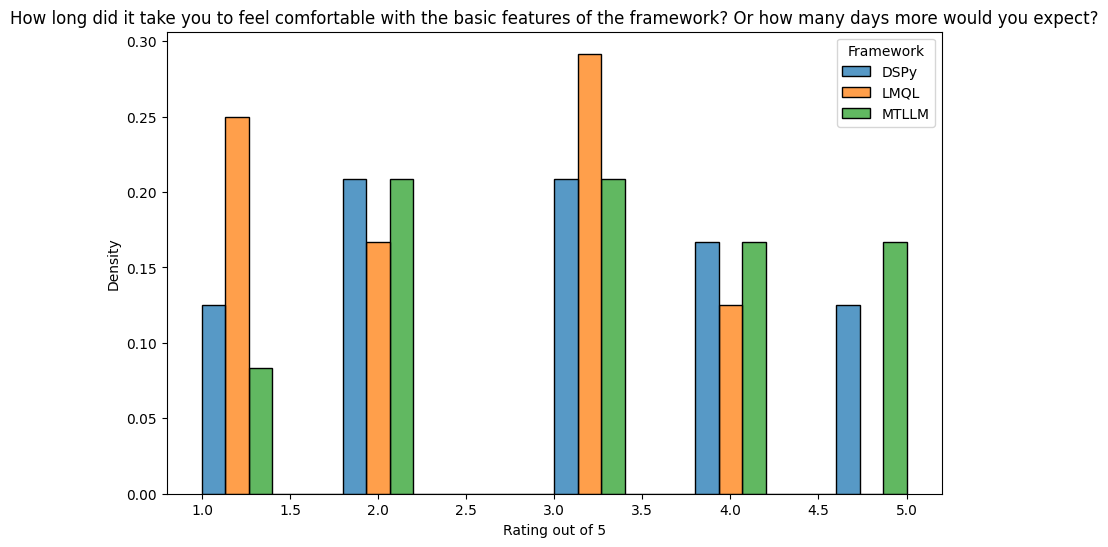

[<matplotlib.patches.Rectangle object at 0x7fca14c4cb60>, <matplotlib.patches.Rectangle object at 0x7fca14c4d3d0>, <matplotlib.patches.Rectangle object at 0x7fca1487a3f0>]


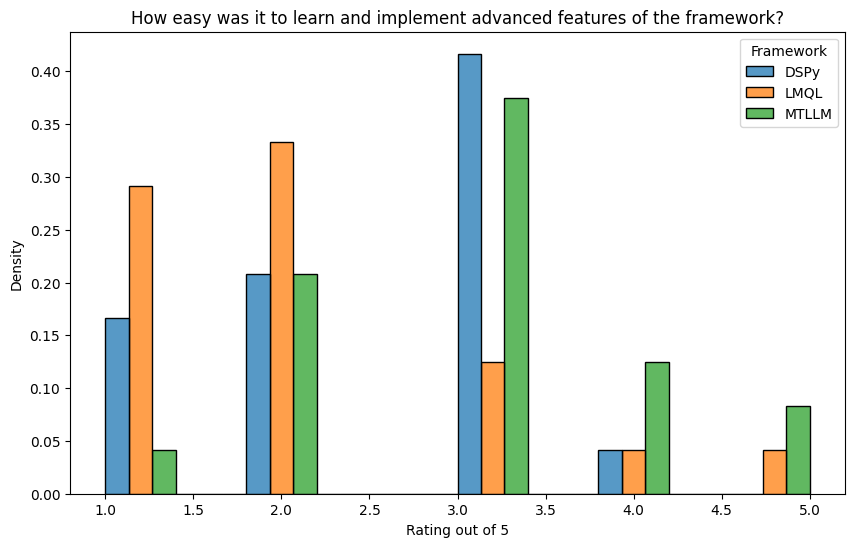

[<matplotlib.patches.Rectangle object at 0x7fca1476e210>, <matplotlib.patches.Rectangle object at 0x7fca1476deb0>, <matplotlib.patches.Rectangle object at 0x7fca1476da60>]


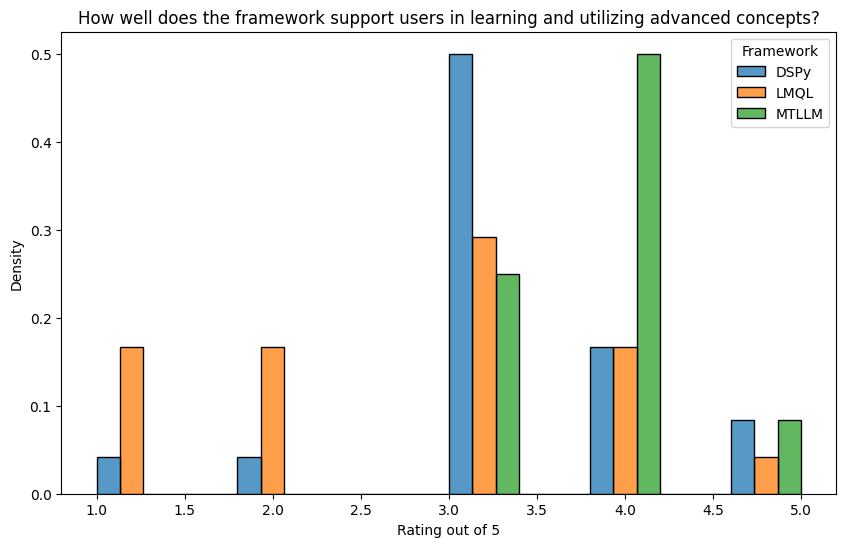

[<matplotlib.patches.Rectangle object at 0x7fca14b84620>, <matplotlib.patches.Rectangle object at 0x7fca14b84590>, <matplotlib.patches.Rectangle object at 0x7fca14b87a10>]


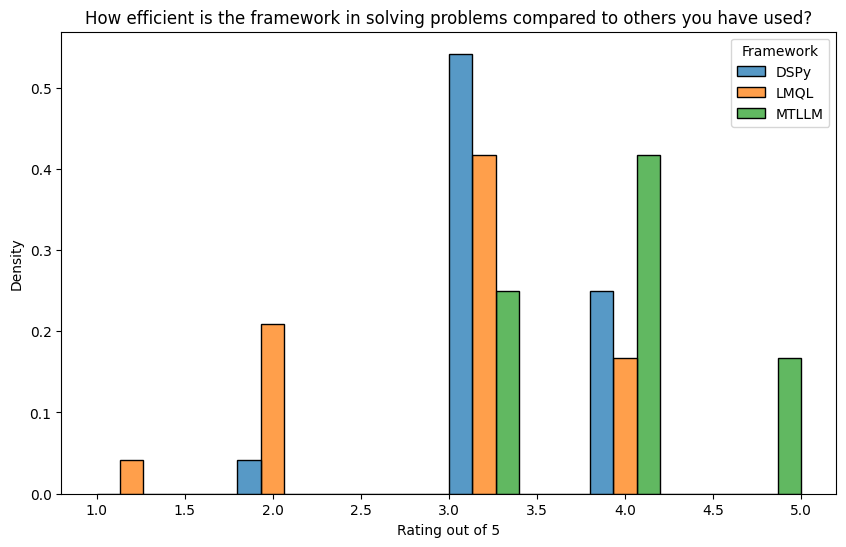

[<matplotlib.patches.Rectangle object at 0x7fca14bd5e20>, <matplotlib.patches.Rectangle object at 0x7fca14bd5070>, <matplotlib.patches.Rectangle object at 0x7fca14bd7380>]


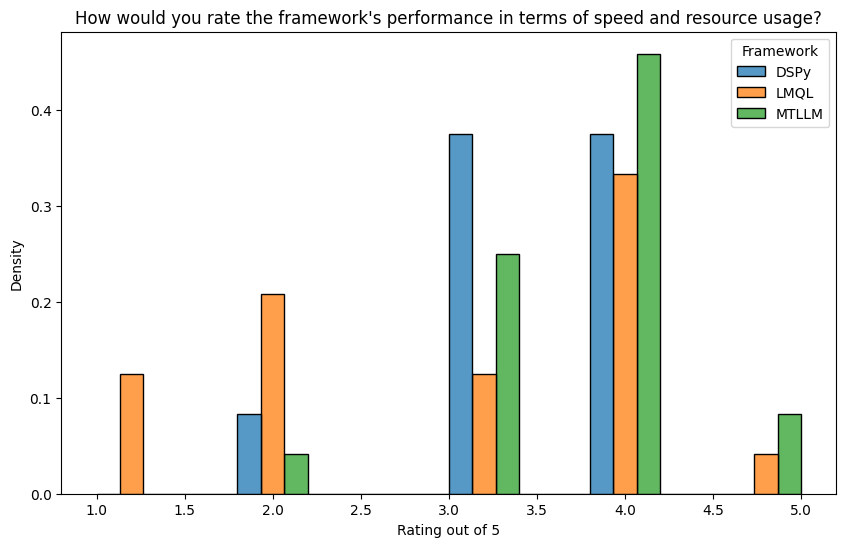

[<matplotlib.patches.Rectangle object at 0x7fca14b9f170>, <matplotlib.patches.Rectangle object at 0x7fca14b9e330>, <matplotlib.patches.Rectangle object at 0x7fca14b9fda0>]


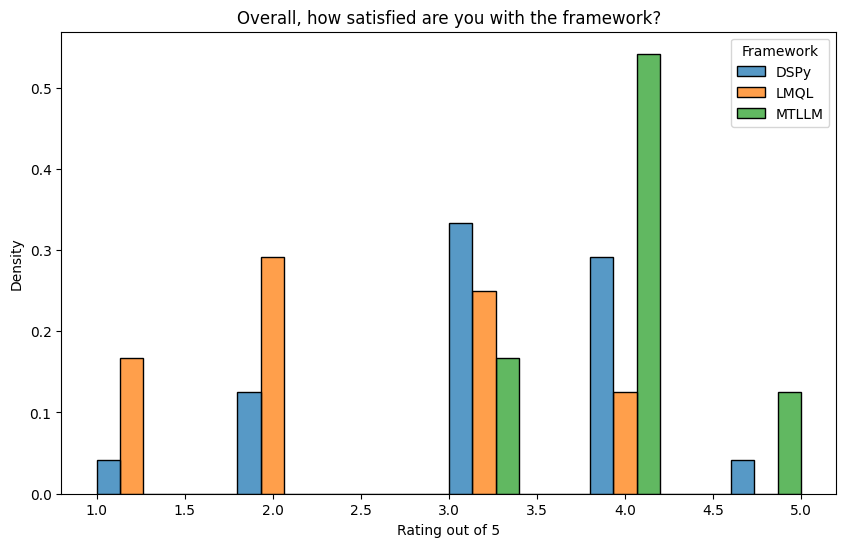

[<matplotlib.patches.Rectangle object at 0x7fca1406f200>, <matplotlib.patches.Rectangle object at 0x7fca1406dbb0>, <matplotlib.patches.Rectangle object at 0x7fca1406df40>]


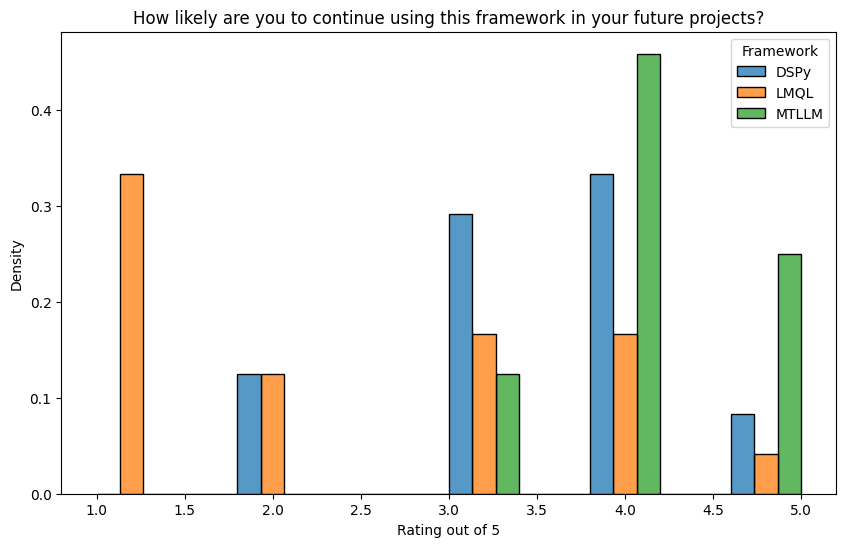

In [21]:
for question in questions.keys():
    data_set = questions[question]
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(pd.melt(data_set, value_name='values', var_name='framework'), x='values', hue='framework', kde=False, stat="density", bins=10, multiple="dodge")
    # sns.histplot(data_set['[DSPy]'],kde=True, stat='density', bins=10, color='red', label='DSPy', alpha=0.5, multiple="dodge")
    # sns.histplot(data_set['[MTLLM]'],kde=True, stat='density', bins=10, color='green', label='MTLLM', alpha=0.5, multiple="dodge")
    # sns.histplot(data_set['[LMQL]'],kde=True, stat='density', bins=10, color='blue', label='LMQL', alpha=0.5, multiple="dodge")
    plt.title(f'{question}')
    plt.xlabel('Rating out of 5')
    plt.ylabel('Density')
    legend = histplot.get_legend()
    print(legend.legend_handles)
    plt.legend(legend.legend_handles, ['DSPy','LMQL', 'MTLLM'], title='Framework', loc='upper right')
    # plt.tight_layout()

    plt.show()